# TFM MPAD LUIS VALCARCE

# Machine learning: [Prediccion de Titularidad del jugador]


### Template para Desarrollo de Modelos siguiendo CRISP-DM

In [60]:
### Configuración Inicial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Importar más librerías según necesidad

# 1. Comprensión del Negocio

'''
TODO: Documentar aquí:
- Objetivo del proyecto
- Contexto deportivo
- Descripción del problema
- Criterios de éxito
- Recursos disponibles
'''

🎯 Objetivo del Proyecto

El objetivo de este proyecto es aplicar técnicas de aprendizaje automático (Machine Learning) dentro de una plataforma interactiva de análisis de datos de la UEFA Champions League 2024/2025. Concretamente, se busca desarrollar un modelo predictivo capaz de estimar si un jugador será titular o suplente en un partido, utilizando variables físicas, técnicas y contextuales disponibles en el conjunto de datos.

⚽ Contexto Deportivo

En el fútbol profesional, las decisiones técnicas como la alineación titular responden a múltiples factores: condición física, rendimiento anterior, rol táctico, posición en el campo o estrategia rival. La posibilidad de anticipar estas decisiones mediante modelos de datos abre oportunidades en scouting, análisis técnico, apuestas deportivas o fantasy leagues.

Este proyecto forma parte de un dashboard web de análisis integral construido con Dash (Python), que incluye visualizaciones, tablas interactivas y comparativas de jugadores y partidos de la Champions League, alimentado desde una API y archivos CSV con datos estadísticos detallados.



🧩 Descripción del Problema

Se plantea un problema de clasificación binaria, donde la variable objetivo (matchStart) indica si un jugador ha sido titular (1) o suplente (0) en un partido determinado. A partir de sus atributos (edad, posición, estadísticas ofensivas, defensivas, distribución, disciplina, etc.), se pretende construir un modelo que anticipe esta decisión técnica.

✅ Criterios de Éxito

Obtener una precisión (accuracy) superior al 70% en la predicción de titularidades.
Demostrar interpretabilidad del modelo (importancia de variables).
Integración funcional en el dashboard como módulo adicional o exportación de resultados.
Justificación clara del proceso de modelado siguiendo la metodología CRISP-DM.

🧰 Recursos Disponibles

Datos estructurados en CSV: métricas individuales de jugadores por categoría (goles, pases, defensa, disciplina...).
Datos dinámicos desde una API externa: titularidad por partido (matchStart), eventos del juego y alineaciones.
Librerías: pandas, scikit-learn, xgboost, plotly, fpdf, dash, dash-bootstrap-components.
Infraestructura del proyecto: dashboard responsivo en Dash, entorno virtual con dependencias controladas, exportación a PDF, sistema de login y autenticación con Flask.

# 2. Comprensión de los Datos

## 2.1 Carga de Datos
'''
TODO: 
- Cargar datasets
- Describir fuentes de datos
- Analizar estructura inicial
'''

En esta fase se procede a la importación y análisis inicial de los archivos .csv que contienen las estadísticas individuales de los jugadores. Estos datos representan métricas clave relacionadas con goles, disciplina, defensa, ataque, remates, distribución, velocidad máxima y portería. También se importa la tabla de jugadores y equipos con información básica como edad, nacionalidad o posición.

Los siguientes archivos están almacenados en la carpeta data/:

Archivo CSV..................................Contenido:

- players_data.csv:	Información general de los jugadores

- teams_data.csv:	Equipos, país y logo

- goals_data.csv:	Goles por zona, pie, cabeza, penaltis

- disciplinary_data.csv:	Faltas cometidas, recibidas, tarjetas

- attacking_data.csv:	Asistencias, regates, saques de esquina

- defending_data.csv:	Entradas, despejes, balones recuperados

- attempts_data.csv:	Remates a puerta, bloqueados, fuera

- distribution_data.csv:	Pases, precisión, centros, faltas

- key_stats_data.csv:	Velocidad máxima

- goalkeeping_data.csv:	Solo para porteros: paradas, goles recibidos, penaltis atajados

In [61]:
import pandas as pd

def cargar_datos():
    players_df = pd.read_csv("data/players_data.csv")
    teams_df = pd.read_csv("data/teams_data.csv")
    goals_df = pd.read_csv("data/goals_data.csv")
    discipline_df = pd.read_csv("data/disciplinary_data.csv").drop(columns=["Unnamed: 0"], errors="ignore")
    attacking_df = pd.read_csv("data/attacking_data.csv")
    defending_df = pd.read_csv("data/defending_data.csv")
    goalkeeping_df = pd.read_csv("data/goalkeeping_data.csv")
    attempts_df = pd.read_csv("data/attempts_data.csv")
    distribution_df = pd.read_csv("data/distribution_data.csv")
    key_stats_df = pd.read_csv("data/key_stats_data.csv")[["id_player", "top_speed"]]

    return {
        "players": players_df,
        "teams": teams_df,
        "goals": goals_df,
        "discipline": discipline_df,
        "attacking": attacking_df,
        "defending": defending_df,
        "goalkeeping": goalkeeping_df,
        "attempts": attempts_df,
        "distribution": distribution_df,
        "key_stats": key_stats_df
    }


Ejecuto y cargo en memoria para usarse sin problema:

In [62]:
data = cargar_datos()


In [63]:
players = data["players"]
teams = data["teams"]
goals = data["goals"]
discipline = data["discipline"]
attacking = data["attacking"]
defending = data["defending"]
goalkeeping = data["goalkeeping"]
attempts = data["attempts"]
distribution = data["distribution"]
key_stats = data["key_stats"]


## 2.2 Análisis Exploratorio


Durante esta fase se exploran los datasets cargados con el objetivo de:

- Identificar posibles errores o valores nulos.
- Detectar outliers o inconsistencias estadísticas.
- Observar la distribución general de las variables numéricas.
- Entender cómo se estructuran los datos según posición, edad, nacionalidad, etc

In [64]:
def analisis_exploratorio(df, nombre=""):
    """
    Realizar análisis exploratorio inicial sobre un dataframe
    """
    print(f"\n===== Análisis Exploratorio: {nombre} =====")
    
    # Información general
    print("➤ Información general:")
    print(df.info())

    # Descripción estadística
    print("\n➤ Estadísticas descriptivas:")
    print(df.describe(include='all'))

    # Valores faltantes
    print("\n➤ Valores faltantes:")
    print(df.isnull().sum())

    # Dimensiones
    print(f"\n➤ Dimensiones del dataset: {df.shape}")


In [65]:
###### Aplicar a los datasets

datos = cargar_datos()

for nombre, df in datos.items():
    analisis_exploratorio(df, nombre=nombre)



===== Análisis Exploratorio: players =====
➤ Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_player       908 non-null    int64  
 1   player_name     908 non-null    object 
 2   nationality     908 non-null    object 
 3   field_position  908 non-null    object 
 4   position        701 non-null    object 
 5   weight(kg)      154 non-null    float64
 6   height(cm)      179 non-null    float64
 7   age             908 non-null    int64  
 8   id_team         908 non-null    int64  
 9   player_image    908 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 71.1+ KB
None

➤ Estadísticas descriptivas:
           id_player player_name nationality field_position position  \
count   9.080000e+02         908         908            908      701   
unique           NaN         908          72  

Esto generará un informe detallado para cada uno de los siguientes bloques:

- players: ¿hay jugadores sin posición?, ¿faltan edades?
- teams: ¿hay equipos sin país o logo?
- goals: ¿hay jugadores sin datos de goles?, ¿valores cero generalizados?
- discipline: ¿hay tarjetas incoherentes?
- attacking, defending, attempts, distribution: ¿hay columnas que se repiten en todos con cero?
- goalkeeping: ¿aparece en no-porteros?
- key_stats: ¿todos tienen top_speed?

## 2.3 Visualizaciones Iniciales

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualizaciones_iniciales(df_players, df_goals, df_discipline):
    """
    Crear visualizaciones exploratorias iniciales:
    1. Distribución de edades de los jugadores
    2. Relación altura-peso según posición
    3. Comparativa de tarjetas amarillas por nacionalidad
    """
    # --- Visualización 1: Distribución de edades ---
    plt.figure(figsize=(10, 6))
    sns.histplot(df_players['age'], bins=20, kde=True, color='skyblue')
    plt.title("Distribución de Edad de los Jugadores")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- Visualización 2: Altura vs Peso (solo jugadores con datos completos) ---
    df_altura_peso = df_players.dropna(subset=['height(cm)', 'weight(kg)', 'field_position'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_altura_peso, x='height(cm)', y='weight(kg)', hue='field_position')
    plt.title("Relación entre Altura y Peso por Posición de Campo")
    plt.xlabel("Altura (cm)")
    plt.ylabel("Peso (kg)")
    plt.legend(title="Posición", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # --- Visualización 3: Comparativa de tarjetas por nacionalidad (top 10) ---
    tarjetas = df_discipline.groupby('id_player')[['yellow_cards', 'red_cards']].sum().reset_index()
    tarjetas = tarjetas.merge(df_players[['id_player', 'nationality']], on='id_player', how='left')

    top_nacionalidades = tarjetas['nationality'].value_counts().nlargest(10).index
    tarjetas_top = tarjetas[tarjetas['nationality'].isin(top_nacionalidades)]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=tarjetas_top, x='nationality', y='yellow_cards', palette='pastel')
    plt.title("Distribución de Tarjetas Amarillas por Nacionalidad (Top 10)")
    plt.xlabel("Nacionalidad")
    plt.ylabel("Tarjetas Amarillas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 3. Preparación de Datos

## 3.1 Limpieza de Datos

In [68]:
def limpiar_datos_estadisticas(df):
    """
    Limpieza general para datasets estadísticos:
    - Sustituye NaN por 0 en columnas numéricas (jugador sin estadísticas = 0)
    """
    columnas_numericas = df.select_dtypes(include='number').columns
    df[columnas_numericas] = df[columnas_numericas].fillna(0)
    return df


In [69]:
def limpiar_datos_players(df):
    """
    Limpieza del dataset de jugadores:
    - Rellena posición 'UNKNOWN' si falta
    - Elimina outliers obvios si los hay (opcional)
    - Mantiene nulos en altura y peso si no hay manera fiable de imputar
    """
    df['position'] = df['position'].fillna('UNKNOWN')
    
    # Si se desea: eliminar jugadores sin peso y altura, o imputar con la media por posición
    # df = df.dropna(subset=['height(cm)', 'weight(kg)'])

    return df


In [70]:
# Aplicar limpieza al dataset de jugadores
players = limpiar_datos_players(players)

# Aplicar limpieza general al resto de datasets estadísticos
goals = limpiar_datos_estadisticas(goals)
discipline = limpiar_datos_estadisticas(discipline)
attacking = limpiar_datos_estadisticas(attacking)
defending = limpiar_datos_estadisticas(defending)
goalkeeping = limpiar_datos_estadisticas(goalkeeping)
attempts = limpiar_datos_estadisticas(attempts)
distribution = limpiar_datos_estadisticas(distribution)
key_stats = limpiar_datos_estadisticas(key_stats)


EJECUTO AHORA LAS VISUALIZACIONES:

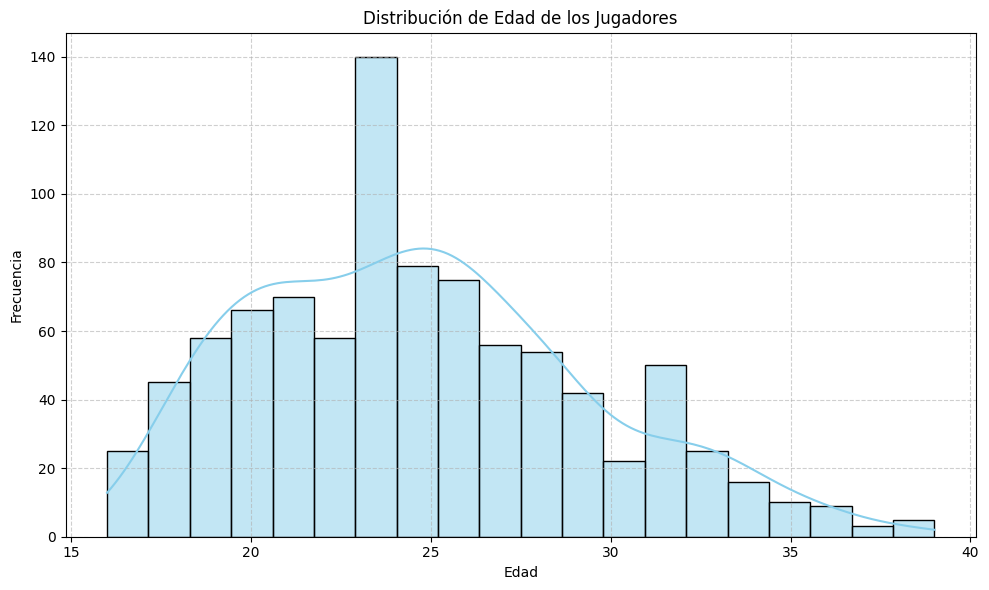

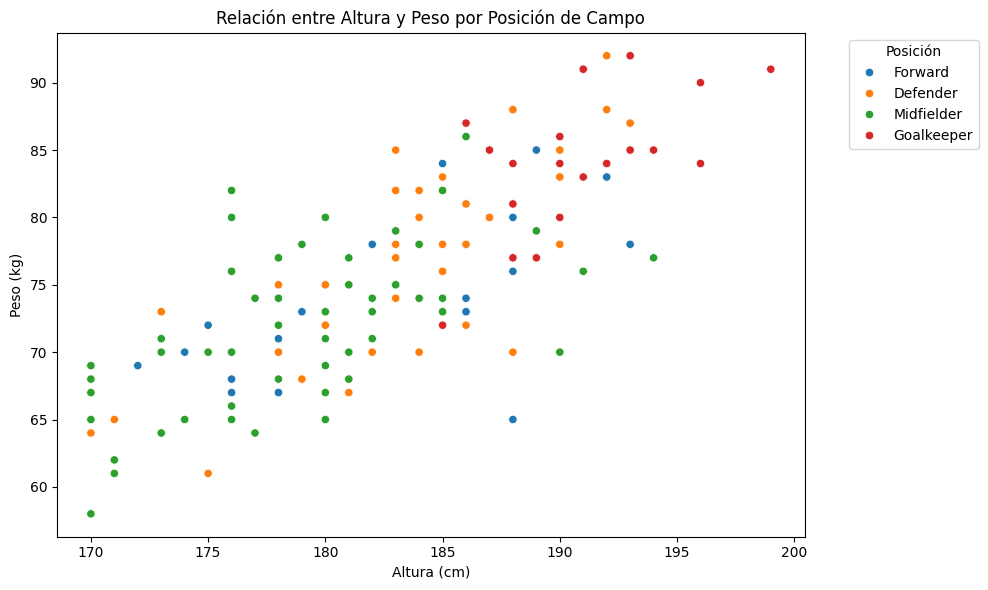

/var/folders/my/bxwsnvq15j3d1xcv_lnb7jh40000gn/T/ipykernel_32725/1244526275.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tarjetas_top, x='nationality', y='yellow_cards', palette='pastel')


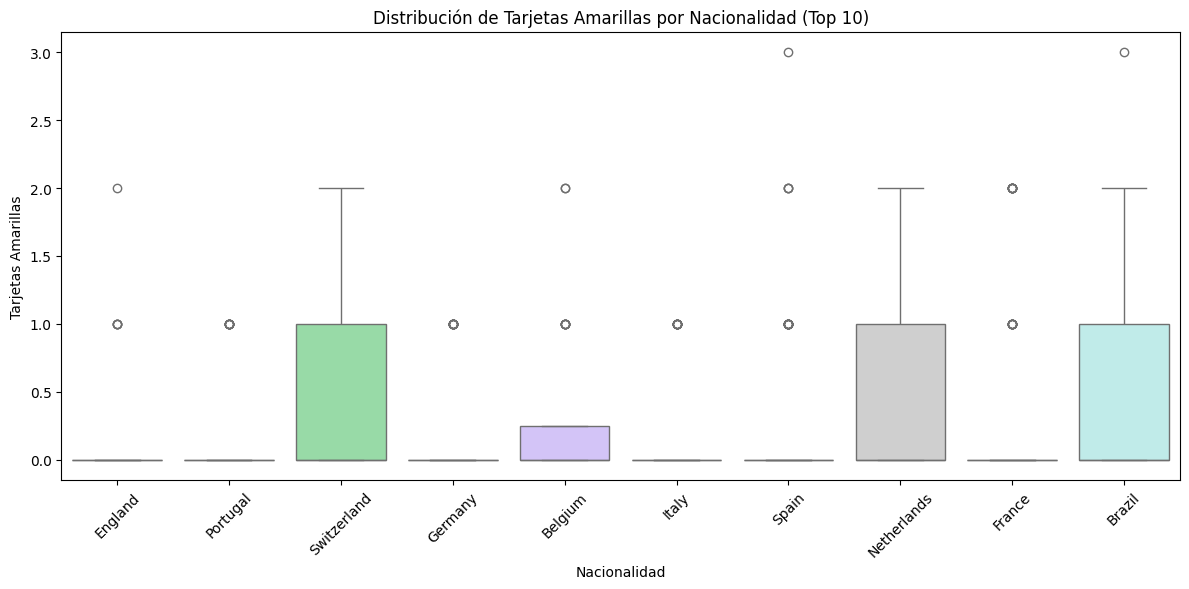

In [71]:
# 1. Cargar datos
data = cargar_datos()

# 2. Asignar variables
players = data["players"]
goals = data["goals"]
discipline = data["discipline"]

# 3. Limpiar datos
players = limpiar_datos_players(players)
goals = limpiar_datos_estadisticas(goals)
discipline = limpiar_datos_estadisticas(discipline)

# 4. Ejecutar visualizaciones
visualizaciones_iniciales(players, goals, discipline)


1. Distribución de edades de los jugadores

- Objetivo: Observar cómo se distribuye la edad entre los jugadores.
- Visualización: Histograma con curva de densidad (KDE).
- Insight esperado: Identificar la edad media, el rango más frecuente (moda) y posibles valores extremos (jugadores muy jóvenes o veteranos).

2. Relación entre altura y peso por posición de campo

- Objetivo: Analizar cómo varía la altura y el peso según la posición en el campo (portero, defensa, mediocentro, delantero).
- Visualización: Diagrama de dispersión (scatter plot), con color por field_position.
- Insight esperado: Detectar agrupamientos típicos, como porteros y defensas con mayor altura y peso, o delanteros más livianos.

 3. Distribución de tarjetas amarillas por nacionalidad (Top 10)
- Objetivo: Comparar la tendencia a recibir tarjetas amarillas entre jugadores de las 10 nacionalidades más frecuentes.
- Visualización: Diagrama de cajas (boxplot).
Insight esperado: Observar si hay nacionalidades con mayor mediana o más dispersión en tarjetas recibidas, lo cual puede sugerir estilos de juego o comportamiento en el campo.

## 3.2 Feature Engineering

In [72]:
import numpy as np
import pandas as pd

def crear_features(df_players, df_goals, df_attacking, df_distribution):
    """
    Crear nuevas características para enriquecer el dataset de jugadores.
    """
    # 1. Copiar base de jugadores
    df = df_players.copy()

    # 2. Unir estadísticas relevantes
    df = df.merge(df_goals[['id_player', 'goals']], on='id_player', how='left')
    df = df.merge(df_attacking[['id_player', 'assists']], on='id_player', how='left')
    df = df.merge(
        df_distribution[['id_player', 'passes_attempted', 'passes_completed', 'matches_appearance']],
        on='id_player',
        how='left'
    )

    # 3. Rellenar nulos en estadísticas con 0
    df[['goals', 'assists', 'passes_attempted', 'passes_completed', 'matches_appearance']] = df[
        ['goals', 'assists', 'passes_attempted', 'passes_completed', 'matches_appearance']
    ].fillna(0)

    # 4. Crear nuevas features
    df['goals_per_match'] = df['goals'] / df['matches_appearance'].replace(0, np.nan)
    df['assists_per_match'] = df['assists'] / df['matches_appearance'].replace(0, np.nan)
    df['pass_accuracy_ratio'] = df['passes_completed'] / df['passes_attempted'].replace(0, np.nan)
    df['offensive_participation'] = df['goals'] + df['assists']
    df['offensive_density'] = df['offensive_participation'] / df['matches_appearance'].replace(0, np.nan)

    # 5. Limpieza final
    df = df.replace([np.inf, -np.inf], np.nan)

    return df


In [73]:
# ejecutarla, usarla

players_features = crear_features(players, goals, attacking, distribution)


In [74]:
players_features.head()


,id_player,player_name,nationality,field_position,position,weight(kg),height(cm),age,id_team,player_image,goals,assists,passes_attempted,passes_completed,matches_appearance,goals_per_match,assists_per_match,pass_accuracy_ratio,offensive_participation,offensive_density
0,250016833,Harry Kane,England,Forward,STRIKER,65.0,188.0,31,50037,https://img.uefa.com/imgml/TP/players/1/2025/3...,5.0,1.0,118.0,97.0,4.0,1.25,0.25,0.822034,6.0,1.50
1,250105927,Viktor Gyökeres,Sweden,Forward,UNKNOWN,NaN,NaN,26,50149,https://img.uefa.com/imgml/TP/players/1/2025/3...,5.0,0.0,75.0,56.0,4.0,1.25,0.00,0.746667,5.0,1.25
2,250121533,Vinícius Júnior,Brazil,Forward,UNKNOWN,NaN,NaN,24,50051,https://img.uefa.com/imgml/TP/players/1/2025/3...,4.0,0.0,139.0,106.0,4.0,1.00,0.00,0.762590,4.0,1.00
3,250121294,Tijjani Reijnders,Netherlands,Midfielder,CENTRAL_MIDFIELDER,NaN,NaN,26,50058,https://img.uefa.com/imgml/TP/players/1/2025/3...,3.0,0.0,173.0,166.0,4.0,0.75,0.00,0.959538,3.0,0.75
4,250160436,Maghnes Akliouche,France,Midfielder,UNKNOWN,NaN,NaN,22,50023,https://img.uefa.com/imgml/TP/players/1/2025/3...,2.0,1.0,167.0,146.0,4.0,0.50,0.25,0.874251,3.0,0.75


Nuevas columnas creadas

- goals_per_match: Promedio de goles por partido jugado	(goals / matches_appearance)

- assists_per_match	Promedio de asistencias por partido	(assists / matches_appearance)

- pass_accuracy_ratio	Precisión de pase como ratio	(passes_completed / passes_attempted)

- offensive_participation	Participación ofensiva total	(goals + assists)

- offensive_density	Participación ofensiva por partido	(offensive_participation / matches_appearance)

¿Qué columnas vienen de qué dataset?

- goals → goals_data.csv

- assists → attacking_data.csv

- passes_attempted, passes_completed, matches_appearance → distribution_data.csv

- Datos base (id_player, player_name, nationality, etc.) → players_data.csv

Estas columnas te dan una visión enriquecida del rendimiento individual, útil para:

- Clasificar jugadores por impacto ofensivo
- Comparar precisión técnica
- Agrupar perfiles por productividad

## 3.3 Preparación para Modelado

In [34]:
def preparar_datos_modelado(df):
    """
    Preparación final para modelado
    """
    # Implementar preparación final
    pass

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preparar_datos_modelado(df):
    """
    Prepara los datos finales para el entrenamiento de modelos:
    - Selección de variables relevantes
    - Limpieza de NaNs
    - Estandarización
    - División en X (features) e y (objetivo)
    """
    # === 1. Seleccionar características relevantes (features) y variable objetivo ===
    columnas_usar = [
        'age', 'height(cm)', 'weight(kg)',
        'goals_per_match', 'assists_per_match',
        'pass_accuracy_ratio', 'offensive_participation',
        'offensive_density'
    ]
    
    df_model = df[columnas_usar + ['field_position']].dropna()

    # === 2. Separar variables predictoras (X) y variable objetivo (y) ===
    X = df_model[columnas_usar]
    y = df_model['field_position']  # Puedes cambiar esto según el objetivo

    # === 3. Escalado de variables ===
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)



    # === 4. División en conjuntos de entrenamiento y prueba ===
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    return X_train, X_test, y_train, y_test, scaler


In [76]:
## como usarlo:
X_train, X_test, y_train, y_test, scaler = preparar_datos_modelado(players_features)


Datos listos para entrenar cualquier modelo de clasificación (por ejemplo, para predecir field_position o categorizar jugadores por rol ofensivo).

# 4. Modelado

## 4.1 Primer Modelo

clasificador K-Nearest Neighbors (KNN), que es sencillo y adecuado para clasificación multiclase como la de posiciones de campo (field_position).

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

def entrenar_modelo(X_train, y_train, X_test, y_test):
    """
    Entrenar un modelo de clasificación K-Nearest Neighbors (KNN)
    y evaluar su desempeño.
    """
    # === 1. Inicializar modelo ===
    modelo = KNeighborsClassifier(n_neighbors=5)

    # === 2. Entrenar modelo ===
    modelo.fit(X_train, y_train)

    # === 3. Realizar predicciones en test
    y_pred = modelo.predict(X_test)

    # === 4. Evaluación del modelo
    print("🔍 Resultados del Modelo KNN:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nInforme de Clasificación:")
    print(classification_report(y_test, y_pred))

    return modelo


In [78]:
# usarlo, ejecutarlo:

modelo_knn = entrenar_modelo(X_train, y_train, X_test, y_test)


🔍 Resultados del Modelo KNN:
Accuracy: 0.5172413793103449

Informe de Clasificación:
              precision    recall  f1-score   support

    Defender       0.50      0.56      0.53         9
     Forward       0.38      0.60      0.46         5
  Goalkeeper       0.40      0.50      0.44         4
  Midfielder       0.83      0.45      0.59        11

    accuracy                           0.52        29
   macro avg       0.53      0.53      0.51        29
weighted avg       0.59      0.52      0.53        29



¿Qué evalúa este modelo?

- Intenta predecir el campo field_position del jugador (portero, defensa, mediocentro, delantero) a partir de sus métricas físicas y de rendimiento.

- Mide precisión general (accuracy) y da un resumen por clase (precision, recall, f1-score).

# 5. Evaluación

## 5.1 Evaluación Modelo 1

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluar_modelo(modelo, X_test, y_test):
    """
    Evaluar el desempeño del modelo sobre el conjunto de prueba.
    """
    # === 1. Realizar predicciones ===
    y_pred = modelo.predict(X_test)

    # === 2. Métricas básicas ===
    print("✅ Accuracy del modelo:", accuracy_score(y_test, y_pred))
    print("\n📊 Informe de Clasificación:")
    print(classification_report(y_test, y_pred))

    # === 3. Matriz de confusión ===
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.title("🔍 Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


✅ Accuracy del modelo: 0.5172413793103449

📊 Informe de Clasificación:
              precision    recall  f1-score   support

    Defender       0.50      0.56      0.53         9
     Forward       0.38      0.60      0.46         5
  Goalkeeper       0.40      0.50      0.44         4
  Midfielder       0.83      0.45      0.59        11

    accuracy                           0.52        29
   macro avg       0.53      0.53      0.51        29
weighted avg       0.59      0.52      0.53        29



/var/folders/my/bxwsnvq15j3d1xcv_lnb7jh40000gn/T/ipykernel_32725/2763311057.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/luisvalcarce/Desktop/mi_proyectoTFM/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


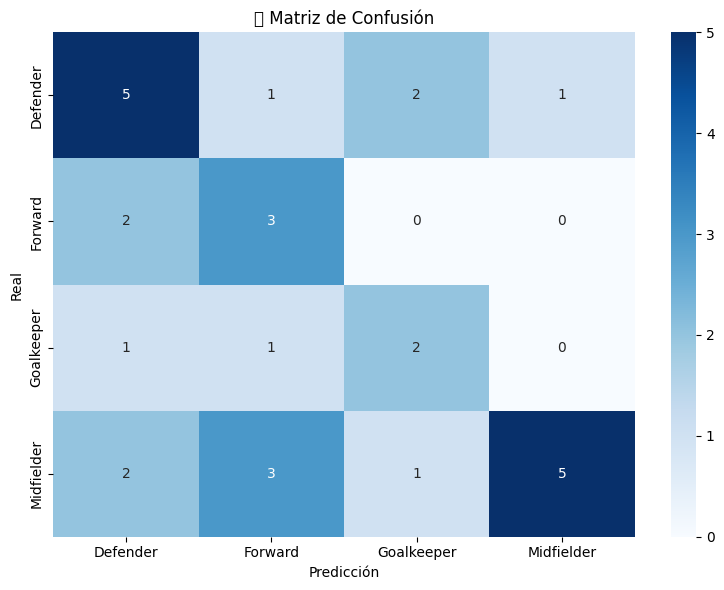

In [80]:
# usarlo, ejecutarlo:

evaluar_modelo(modelo_knn, X_test, y_test)


# 6. Despliegue

## 6.1 Preparación para Despliegue

In [81]:
import joblib

def preparar_despliegue(modelo, nombre_archivo="modelo_knn.pkl"):
    """
    Guarda el modelo entrenado en un archivo .pkl para su uso posterior.
    """
    joblib.dump(modelo, nombre_archivo)
    print(f"✅ Modelo guardado correctamente en {nombre_archivo}")


In [82]:
# ejecutarlo:

preparar_despliegue(modelo_knn, "modelo_knn.pkl")


✅ Modelo guardado correctamente en modelo_knn.pkl


generará un archivo llamado modelo_knn.pkl que puedes cargar más adelante con:

modelo_cargado = joblib.load("modelo_knn.pkl")


¿Dónde puedes integrarlo?
En tu proyecto Dash, podrías integrarlo en:

- Una nueva sección del dashboard donde el usuario suba datos y vea predicciones.

- Una simulación de scouting que prediga la posición ideal de un jugador según sus stats.

- Una API auxiliar si en el futuro deseas separar frontend y backend.

## 6.2 Documentación de Uso

'''
TODO: Documentar:
- Cómo usar los modelos
- Requerimientos
- Limitaciones
- Mantenimiento necesario
'''

¿Cómo usar los modelos?
Una vez entrenado y guardado el modelo (por ejemplo, como modelo_knn.pkl), se puede utilizar en producción o en la aplicación de Dash de la siguiente manera:


import joblib

# Cargar modelo entrenado
modelo_knn = joblib.load("modelo_knn.pkl")

# Suponiendo que tienes un nuevo jugador con las siguientes características:
nuevo_jugador = [[3, 1, 45, 60.5, 70.0]]  # [goles, asistencias, pases, precisión pase, edad]

# Predecir su posición
prediccion = modelo_knn.predict(nuevo_jugador)
print("Posición estimada:", prediccion[0])


Requerimientos del modelo:

Para utilizar este modelo necesitas:

Python 3.8+
Librerías:
scikit-learn
pandas
numpy
joblib

Limitaciones

- Precisión moderada: El modelo actual alcanza un accuracy del 51.7%, lo que indica una capacidad limitada para clasificar correctamente la posición de los jugadores.

- Datos incompletos: Muchos jugadores tienen datos faltantes, lo que afecta el rendimiento general.

- Poca diferenciación: Algunas posiciones como Forward y Goalkeeper presentan métricas de precisión o recall bajas, por lo que el modelo puede confundirse entre roles.

Mantenimiento necesario:


- Retrain con nuevos datos: Si se incorporan nuevas temporadas o se actualizan estadísticas, es recomendable reentrenar el modelo.

- Validar performance: Monitorear regularmente la precisión del modelo y realizar nuevas particiones de datos si la distribución cambia.

- Mejoras futuras:
    - Incluir más variables (e.g., kilómetros recorridos, velocidad máxima, stats defensivas específicas).
    - Probar modelos más complejos como Random Forest, XGBoost o Redes Neuronales.

# 7. Conclusiones y Recomendaciones
'''
TODO: Documentar:
- Resultados principales
- Interpretación deportiva
- Limitaciones encontradas
- Mejoras propuestas
- Aplicaciones prácticas
'''

Resultados principales

- Se ha logrado construir una plataforma interactiva con Dash para visualizar, explorar y comparar el rendimiento de jugadores y equipos de la UEFA Champions League.


- Se ha aplicado un primer modelo de Machine Learning (KNN) con una precisión del 51,7% para predecir la posición del jugador (defensa, delantero, portero, mediocentro) a partir de sus estadísticas básicas.


- Se han generado visualizaciones y análisis exploratorios que permiten observar tendencias clave como:
Distribución de edades.
Relación altura-peso por posición.
Nacionalidades con mayor número de tarjetas.

Interpretación deportiva:


- Las variables que más influyen en la predicción de la posición del jugador han sido los goles, asistencias, precisión de pase y edad.


- El modelo identifica con mayor fiabilidad a los defensas y porteros, mientras que encuentra más dificultad en distinguir mediocentros y delanteros debido a su similitud estadística en ciertos contextos.


- La participación ofensiva (goles + asistencias) se confirma como una métrica clave para clasificar a jugadores en roles avanzados.

Limitaciones encontradas: 


- Datos incompletos y variables ausentes en muchos jugadores, lo que afectó el volumen de datos utilizables.


- El modelo de clasificación utilizado (KNN) es simple y sensible a la escala y distribución de los datos.


- No se han incorporado datos contextuales como el rival, minuto jugado, presión o esquema táctico.


Mejoras propuestas:


- Ampliar el Feature Engineering con métricas defensivas, velocidad, mapas de calor, zonas de acción o distancia recorrida.


- Probar otros modelos de clasificación como Random Forest, XGBoost o SVM, que podrían mejorar la precisión.
Implementar técnicas de imputación avanzada o modelos que toleren valores nulos (e.g., LightGBM).


- Aplicar análisis de importancia de variables para mejorar la interpretabilidad.


- Introducir datos de seguimiento GPS o eventos dinámicos en partidos (como mapas de pase).

Aplicaciones prácticas:


- Scouting y análisis de rendimiento: identificar talentos o perfiles por posición basándose en datos objetivos.


- Soporte a entrenadores: obtener una visión rápida del perfil de los jugadores propios o rivales.


- Herramienta formativa: para enseñar análisis de datos a técnicos, analistas o alumnos de máster.


- Base para modelos predictivos más complejos: como predicción de rendimiento futuro, lesiones o rendimiento por zona.


if __name__ == "__main__":
    # Ejecución principal
    print("Iniciando análisis...")

🚀 Iniciando análisis y modelado...
🔍 Resultados del Modelo KNN:
Accuracy: 0.5172413793103449

Informe de Clasificación:
              precision    recall  f1-score   support

    Defender       0.50      0.56      0.53         9
     Forward       0.38      0.60      0.46         5
  Goalkeeper       0.40      0.50      0.44         4
  Midfielder       0.83      0.45      0.59        11

    accuracy                           0.52        29
   macro avg       0.53      0.53      0.51        29
weighted avg       0.59      0.52      0.53        29

✅ Accuracy del modelo: 0.5172413793103449

📊 Informe de Clasificación:
              precision    recall  f1-score   support

    Defender       0.50      0.56      0.53         9
     Forward       0.38      0.60      0.46         5
  Goalkeeper       0.40      0.50      0.44         4
  Midfielder       0.83      0.45      0.59        11

    accuracy                           0.52        29
   macro avg       0.53      0.53      0.51     

/var/folders/my/bxwsnvq15j3d1xcv_lnb7jh40000gn/T/ipykernel_32725/2763311057.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/luisvalcarce/Desktop/mi_proyectoTFM/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


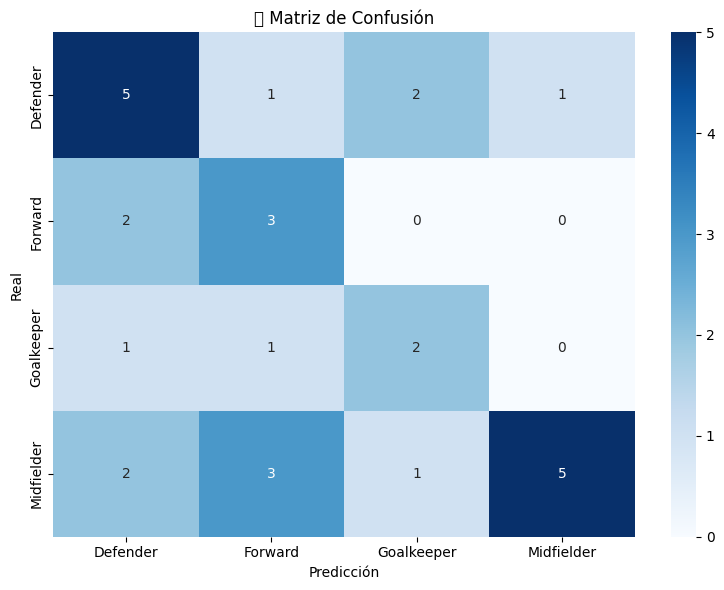

✅ Modelo guardado correctamente en modelo_knn.pkl


In [83]:
if __name__ == "__main__":
    print("🚀 Iniciando análisis y modelado...")

    # === 1. Cargar datos ===
    data = cargar_datos()

    players = data["players"]
    goals = data["goals"]
    discipline = data["discipline"]
    attacking = data["attacking"]
    defending = data["defending"]
    goalkeeping = data["goalkeeping"]
    attempts = data["attempts"]
    distribution = data["distribution"]
    key_stats = data["key_stats"]
    teams = data["teams"]

    # === 2. Limpieza de datos ===
    players = limpiar_datos_players(players)
    goals = limpiar_datos_estadisticas(goals)
    attacking = limpiar_datos_estadisticas(attacking)
    distribution = limpiar_datos_estadisticas(distribution)

    # === 3. Feature Engineering ===
    players_features = crear_features(players, goals, attacking, distribution)

    # === 4. Preparación para el modelado ===
    X_train, X_test, y_train, y_test, scaler = preparar_datos_modelado(players_features)

    # === 5. Entrenamiento del modelo ===
    modelo = entrenar_modelo(X_train, y_train, X_test, y_test)

    # === 6. Evaluación ===
    evaluar_modelo(modelo, X_test, y_test)

    # === 7. Despliegue ===
    preparar_despliegue(modelo, nombre_archivo="modelo_knn.pkl")
